Python Class Final Project

# Part 1 :

 Go to the Social Security Administration US births website, select the births table there and copy it to the clipboard. 
 Use the  pandas read_clipboard function to read the data into a pandas DataFrame

In [17]:
import pandas as pd
birth_table= pd.read_clipboard(names=['Year of Birth','Male','Female','Total'])
birth_table   # show the table

,Year of Birth,Male,Female,Total
0,1880,"118,399","97,606","216,005"
1,1881,"108,282","98,855","207,137"
2,1882,"122,031","115,695","237,726"
3,1883,"112,475","120,059","232,534"
4,1884,"122,738","137,585","260,323"
5,1885,"115,945","141,948","257,893"
6,1886,"119,042","153,735","272,777"
7,1887,"109,312","155,422","264,734"
8,1888,"129,906","189,445","319,351"
9,1889,"119,032","189,219","308,251"


In [3]:
# write the data to csv
birth_table.to_csv('birth_table.csv',index=False,header=True)
birth = pd.read_csv("birth_table.csv")
type(birth)  # check the data type


pandas.core.frame.DataFrame

In [4]:
# change the female , male,total's data type to int format.
birth["Female"] = birth["Female"].str.replace(",","").astype(int)
birth["Male"] = birth["Male"].str.replace(",","").astype(int)
birth["Total"] = birth["Total"].str.replace(",","").astype(int)

Plot the female and male birth by year, check the pattern of birth rate in gender

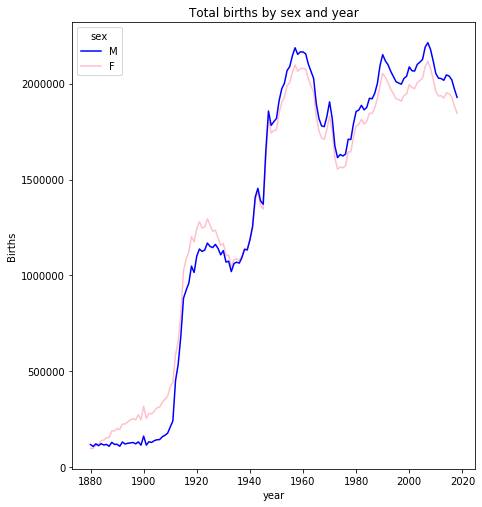

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(1,figsize=(8,8))
ax1 = fig.add_subplot(111)
fig.subplots_adjust(top=0.9,left=0.2)
ax1.set_ylabel('Births')
ax1.set_xlabel('year')
(p1,) = ax1.plot("Year of Birth","Female",data=birth,color='pink',label='F')
(p2,) = ax1.plot("Year of Birth","Male",data=birth,color='blue',label='M')

ax1.set_title('Total births by sex and year')
ax1.legend((p2,p1),('M','F'),loc='upper left',title='sex')
plt.show()  


From the plot above, both female and male were follow same fluctuant. Before 1940, the number of female birth rate was higher than male, after 1940,  this situation was conversed. In particular, between the World War, the male experienced obviously decline than female. Between 1940 and 1960, the U.S were settled into a baby boomer area. 

##  From baby_name.zip file get a list of male and female names

In [9]:
import pandas as pd
years = list(range(1881,2011))
pieces = []
columns = ['name','sex','births']
    
for year in years:
    path = 'C:/Users/yusha/names/yob{0:d}.txt'.format(year)
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)    
    
df = pd.concat(pieces, ignore_index=True)

In [10]:
df.head()

,name,sex,births,year
0,Mary,F,6919,1881
1,Anna,F,2698,1881
2,Emma,F,2034,1881
3,Elizabeth,F,1852,1881
4,Margaret,F,1658,1881


In [11]:
df.dtypes

name      object
sex       object
births     int64
year       int64
dtype: object

In [12]:
df.year.max()

2010

In [13]:
df.year.min()

1881

In [15]:
df.groupby(['year','sex']).births.sum()

year  sex
1881  F        91955
      M       100748
1882  F       107851
      M       113687
1883  F       112322
      M       104632
1884  F       129021
      M       114445
1885  F       133056
      M       107802
1886  F       144538
      M       110785
1887  F       145983
      M       101412
1888  F       178631
      M       120857
1889  F       178369
      M       110590
1890  F       190377
      M       111026
1891  F       185486
      M       101198
1892  F       212350
      M       122038
1893  F       212908
      M       112319
1894  F       222923
      M       115775
1895  F       233632
      M       117398
              ...   
1996  F      1751681
      M      1892700
1997  F      1739331
      M      1883571
1998  F      1765390
      M      1909676
1999  F      1772139
      M      1918267
2000  F      1813960
      M      1961702
2001  F      1798284
      M      1940498
2002  F      1794358
      M      1938941
2003  F      1824406
      M      1972439
200

# Part 2

## Aggregate the data for all years, count the letter frequency and the last letter frequency in different gender

In [18]:
# count the the total number of name appearance among all years
total_name_count = df.pivot_table('births','name',columns='sex',aggfunc=sum)
total_name_count

sex,F,M
name,,
Aaban,NaN,20.0
Aabid,NaN,5.0
Aabriella,5.0,NaN
Aadam,NaN,133.0
Aadan,NaN,69.0
Aadarsh,NaN,109.0
Aaden,5.0,2972.0
Aadesh,NaN,10.0
Aadhav,NaN,29.0


Find the set of all male names and the set of all female names. 

In [71]:
female_name = df[df["sex"] == "F"]
female_set=set(female_name['name'])
print(len(female_set))  # the set of all female names

61406


In [23]:
Male_name = df[df["sex"] == "M"]  
Male_set=set(Male_name['name'])  # find the set of all male names
print(len(Male_set))   #calculate the length of Male
print(len(female_set))   #calculate the length of Female

36741
61406


Use Python Counters to get separate letter frequencies for the male and female name sets.

In [36]:
letter_female =[]
for x in female_set:
      x = x.lower()
      letter_female.extend(list(x))  

from collections import Counter
counts_female = Counter()
for i in letter_female:
    counts_female[i] += 1
Counter(letter_female)

Counter({'s': 18624,
         'h': 17585,
         'a': 75916,
         'n': 36817,
         'd': 11030,
         'r': 24559,
         'i': 36775,
         'k': 8830,
         't': 15705,
         'o': 11707,
         'e': 47107,
         'l': 28694,
         'y': 17452,
         'c': 8621,
         'b': 4374,
         'm': 11768,
         'v': 3844,
         'p': 1775,
         'z': 3210,
         'j': 5737,
         'w': 1608,
         'u': 5932,
         'g': 3298,
         'q': 1183,
         'x': 580,
         'f': 1513})

In [39]:
# the letter frequency in male
letter_male =[]
for x in Male_set:
      x = x.lower()
      letter_male.extend(list(x))  
counts_male = Counter()

for i in letter_male:
    counts_male[i] += 1
Counter(letter_male)

Counter({'d': 9300,
         'i': 17181,
         'e': 24360,
         't': 8878,
         'r': 18136,
         'a': 30353,
         'l': 13169,
         'h': 8241,
         'b': 3399,
         'n': 20428,
         'j': 4641,
         'm': 7731,
         'k': 5606,
         'v': 3516,
         'u': 6054,
         's': 10454,
         'g': 2546,
         'o': 13983,
         'q': 980,
         'w': 1787,
         'y': 7138,
         'z': 2004,
         'c': 5379,
         'f': 1447,
         'x': 523,
         'p': 1463})

Count the frequency of letter as the last letter for both for male and female names

In [42]:
last_letter_female =[]
for n in female_set:
      last_letter_female.extend(n[-1])  
    
counts_last_f = Counter()
for i in last_letter_female:
    counts_last_f[i] += 1
Female_name_last_letters = Counter(last_letter_female)
Female_name_last_letters

Counter({'a': 26199,
         'e': 11501,
         'y': 3501,
         'r': 854,
         'h': 3921,
         'n': 6351,
         's': 1124,
         'l': 2043,
         'o': 569,
         'm': 224,
         'i': 3357,
         'd': 301,
         'z': 170,
         't': 618,
         'k': 93,
         'x': 54,
         'u': 185,
         'b': 38,
         'j': 25,
         'g': 135,
         'p': 25,
         'c': 53,
         'w': 29,
         'v': 14,
         'q': 10,
         'f': 12})

In [44]:
last_letter_male =[]
for n in Male_set:
      last_letter_male.extend(n[-1])  
counts_last_male=Counter()
for i in last_letter_male:
    counts[i] += 1
Male_name_last_letters = Counter(last_letter_male)
Male_name_last_letters

Counter({'r': 2254,
         'd': 1473,
         'n': 9679,
         'e': 4451,
         'm': 803,
         'h': 1168,
         'q': 54,
         'y': 2137,
         's': 2727,
         'z': 319,
         'l': 2938,
         'k': 812,
         'o': 2073,
         't': 844,
         'f': 154,
         'c': 237,
         'p': 108,
         'a': 1757,
         'i': 1587,
         'u': 237,
         'g': 279,
         'b': 231,
         'v': 109,
         'x': 106,
         'w': 110,
         'j': 94})

In [49]:
# combine them to dataframe
from pandas import DataFrame, read_csv
Frequency_female_name_last_letters = DataFrame(data = Female_name_last_letters.items())
Frequency_male_name_last_letters = DataFrame(data = Male_name_last_letters.items())
last_letter_in_names= pd.merge(Frequency_female_name_last_letters, Frequency_male_name_last_letters,on=0)
last_letter_in_names=last_letter_in_names.rename(columns={0:'letter','1_x':'last_letter_female','1_y':'last_letter_male'})
last_letter_in_names

,letter,last_letter_female,last_letter_male
0,a,26199,1757
1,e,11501,4451
2,y,3501,2137
3,r,854,2254
4,h,3921,1168
5,n,6351,9679
6,s,1124,2727
7,l,2043,2938
8,o,569,2073
9,m,224,803


In [50]:
last_letter_in_names['Total']=last_letter_in_names['last_letter_female']+last_letter_in_names['last_letter_male']
last_letter_in_names.head()

,letter,last_letter_female,last_letter_male,Total
0,a,26199,1757,27956
1,e,11501,4451,15952
2,y,3501,2137,5638
3,r,854,2254,3108
4,h,3921,1168,5089


## Use matplotlib to draw a plot that for each letter (x-axis) shows the frequency of that letter (y-axis) as the last letter for both for male and female names.

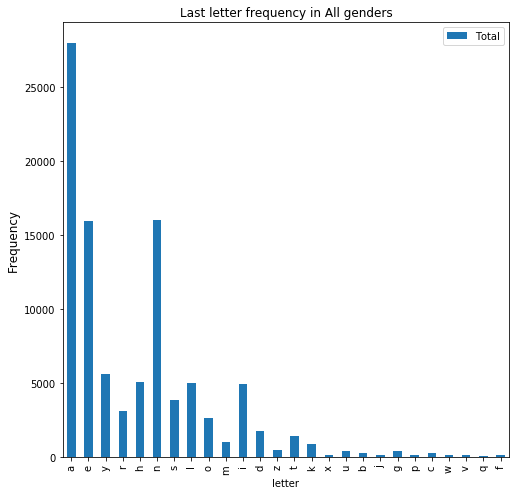

In [52]:
# plot the last letter frequency for all genders 
%matplotlib inline
from matplotlib import pyplot as plt
ax =last_letter_in_names.plot.bar(x='letter', y='Total',title='Last letter frequency in All genders',figsize=(8, 8))
ax.set_ylabel("Frequency", fontsize=12)
plt.show()

From the above plot,we can see letter 'a' has highest frequency, letter 'f' has lowest frequency

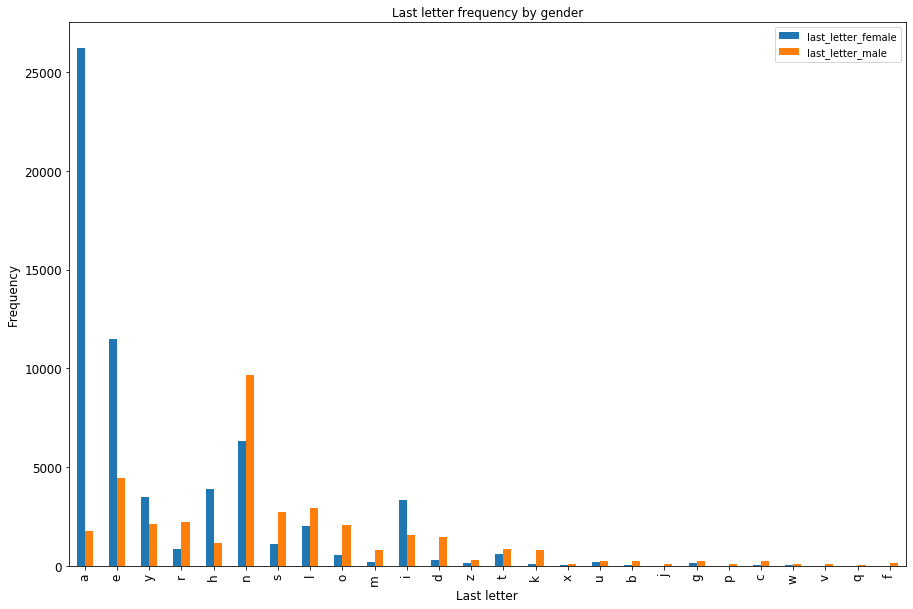

In [54]:
# plot the last letter frequncy by each gender
ax = last_letter_in_names[['last_letter_female','last_letter_male']].plot(kind='bar', title ='Last letter frequency by gender', figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Last letter", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_xticklabels(last_letter_in_names["letter"])
plt.show()


From above plot, we can see most female name used 'a' as last letter while most male used 'n' as last letter of name

# Part 3

Now do just female names, but aggregate data in decades (10 year) increments. Produce a plot that contains the 1880s line, the 1940s line, and the 1990s line, as well as the female line for all years aggregated together from Part Two.

aggregate female data in decades (10 year) 1880s,1940s,1990s

In [56]:
#filter the table in 1880s,1940s,1990s
n1880s=female_name[(female_name['year']>=1880) & (female_name['year']<=1889)]
n1940s=female_name[(female_name['year']>=1940) & (female_name['year']<=1949)]
n1990s=female_name[(female_name['year']>=1990) & (female_name['year']<=1999)]


In [57]:
# find the names sets in 1880s,1940s,1990s.
n1880s_set=set(n1880s['name']) 
n1940s_set=set(n1940s['name']) 
n1990s_set=set(n1990s['name'])
print(len(n1880s_set))
print(len(n1940s_set))
print(len(n1990s_set))

2051
9676
30831


In [58]:
# count the letter frequencies of female names in 1880s,1940s,1990s sets
letter_1880s=dict()
for name in n1880s_set:
    F_letter1=Counter(name.lower())
    for letter in F_letter1.keys():
        if letter in letter_1880s:
            letter_1880s[letter]+=F_letter1[letter]
        else:
            letter_1880s[letter]=F_letter1[letter]


letter_1940s=dict()
for name in n1940s_set:
    F_letter2=Counter(name.lower())
    for letter in F_letter2.keys():
        if letter in letter_1940s:
             letter_1940s[letter]+=F_letter2[letter]
        else:
             letter_1940s[letter]=F_letter2[letter]
                
letter_1990s=dict()
for name in n1990s_set:
    F_letter3=Counter(name.lower())
    for letter in F_letter3.keys():
        if letter in letter_1990s:
             letter_1990s[letter]+=F_letter3[letter]
        else:
             letter_1990s[letter]=F_letter3[letter]
                
print(letter_1880s)
print(letter_1940s)
print(letter_1990s)

{'n': 893, 'o': 513, 'r': 769, 'a': 1794, 'h': 298, 'm': 383, 'g': 162, 'l': 1154, 'i': 1218, 'p': 117, 'k': 44, 'e': 1825, 'y': 202, 't': 584, 'd': 393, 'w': 38, 'f': 87, 's': 396, 'z': 78, 'u': 214, 'v': 195, 'c': 293, 'b': 169, 'j': 80, 'x': 18, 'q': 5}
{'f': 320, 'r': 4883, 'a': 8887, 'n': 6025, 's': 1841, 'h': 1508, 'e': 9440, 'b': 742, 'g': 750, 'u': 967, 'l': 5674, 'd': 2201, 't': 2823, 'i': 4613, 'c': 1604, 'y': 1656, 'm': 1671, 'k': 407, 'o': 2549, 'w': 326, 'v': 888, 'q': 66, 'j': 761, 'x': 61, 'p': 370, 'z': 247}
{'s': 10830, 'h': 9232, 'a': 39785, 'n': 18704, 'd': 5150, 'r': 12088, 'i': 18589, 'k': 5191, 't': 7589, 'o': 5157, 'e': 22252, 'y': 8398, 'c': 4689, 'b': 2149, 'm': 5899, 'v': 1418, 'l': 12823, 'j': 3117, 'w': 581, 'q': 865, 'z': 1344, 'p': 794, 'u': 2771, 'x': 315, 'g': 1433, 'f': 664}


In [61]:
Total_f=Counter(letter_female)

In [63]:
# plot the 1880s,1940s,1990s
# Create letter frequency table 
df1880s= pd.DataFrame(list(letter_1880s.items()), columns=['letters', 'count_1880s'])
df1940s= pd.DataFrame(list(letter_1940s.items()), columns=['letters', 'count_1940s'])
df1990s= pd.DataFrame(list(letter_1990s.items()), columns=['letters', 'count_1990s'])
df_all_f= pd.DataFrame(list(Total_f.items()), columns=['letters', 'count_Allyear'])
result1=pd.merge(df1880s,df1940s,on='letters')
result2=pd.merge(result1,df1990s,on='letters')
result3=pd.merge(result2,df_all_f,on='letters')

data1=result3.sort_values(by='letters',ascending=True)
data1

,letters,count_1880s,count_1940s,count_1990s,count_Allyear
3,a,1794,8887,39785,75916
22,b,169,742,2149,4374
21,c,293,1604,4689,8621
14,d,393,2201,5150,11030
11,e,1825,9440,22252,47107
16,f,87,320,664,1513
6,g,162,750,1433,3298
4,h,298,1508,9232,17585
8,i,1218,4613,18589,36775
23,j,80,761,3117,5737


Plot letter freqency in 1880s, 1940s,1990s and all years

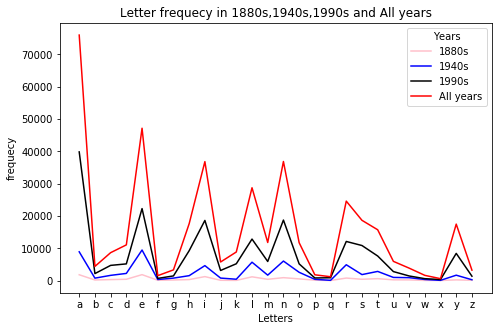

In [64]:
fig = plt.figure(1,figsize=(15,10))
ax1 = fig.add_subplot(111)
fig.subplots_adjust(top=0.5,left=0.5)
ax1.set_ylabel('frequecy')

ax1.set_xlabel('Letters')
(p1,) = ax1.plot('letters','count_1880s',data=data1,color='pink',label='1880s')
(p2,) = ax1.plot('letters','count_1940s',data=data1,color='blue',label='1940s')
(p3,) = ax1.plot('letters','count_1990s',data=data1,color='black',label='1990s')
(p4,) = ax1.plot('letters','count_Allyear',data=data1,color='red',label='1990s')
ax1.set_title('Letter frequecy in 1880s,1940s,1990s and All years')
    
ax1.legend((p1,p2,p3,p4),('1880s','1940s','1990s','All years'),loc='upper right',title='Years')
plt.show()



From the above plot, we could see the letter frequency looks stable in  decades.

Let's check the last letter frequency in decades (1880s,1940s,1990s)

In [65]:
# count the last letter frequecy of female names in 1880s,1940s,1990s
last_letter_1880=dict()
for name in n1880s_set:
    letter_1=Counter(name[-1].lower())
    for letter in letter_1.keys():
        if letter in last_letter_1880:
            last_letter_1880[letter]+=letter_1[letter]
        else:
            last_letter_1880[letter]=letter_1[letter]


last_letter_1940=dict()
for name in n1940s_set:
    letter_2=Counter(name[-1].lower())
    for letter in letter_2.keys():
        if letter in last_letter_1940:
            last_letter_1940[letter]+=letter_2[letter]
        else:
            last_letter_1940[letter]=letter_2[letter]


last_letter_1990=dict()
for name in n1990s_set:
    letter_3=Counter(name[-1].lower())
    for letter in letter_3.keys():
        if letter in last_letter_1990:
            last_letter_1990[letter]+=letter_3[letter]
        else:
            last_letter_1990[letter]=letter_3[letter]

print(last_letter_1880)
print(last_letter_1940)
print(last_letter_1990)
print(Female_name_last_letters)
print(len(last_letter_1880))
print(len(last_letter_1940))
print(len(last_letter_1990))
print(len(Female_name_last_letters))

{'h': 50, 'a': 909, 'y': 115, 'n': 58, 'e': 700, 'd': 22, 't': 22, 's': 43, 'r': 38, 'l': 55, 'i': 5, 'm': 9, 'o': 10, 'k': 3, 'g': 4, 'z': 2, 'u': 3, 'x': 1, 'c': 1, 'w': 1}
{'n': 1083, 's': 250, 'a': 3556, 'e': 2886, 'r': 138, 'y': 516, 'l': 473, 'd': 78, 'i': 244, 'g': 18, 'h': 163, 'm': 23, 't': 109, 'o': 73, 'p': 3, 'u': 17, 'x': 8, 'c': 6, 'w': 5, 'b': 2, 'z': 12, 'k': 12, 'v': 1}
{'a': 14052, 'e': 5274, 'y': 1918, 'r': 396, 'h': 1609, 'n': 3282, 'l': 918, 'o': 221, 'i': 1705, 's': 486, 'z': 85, 't': 295, 'k': 45, 'm': 130, 'u': 79, 'x': 27, 'b': 22, 'g': 69, 'd': 127, 'p': 18, 'w': 15, 'v': 8, 'c': 29, 'f': 5, 'j': 14, 'q': 2}
Counter({'a': 26199, 'e': 11501, 'n': 6351, 'h': 3921, 'y': 3501, 'i': 3357, 'l': 2043, 's': 1124, 'r': 854, 't': 618, 'o': 569, 'd': 301, 'm': 224, 'u': 185, 'z': 170, 'g': 135, 'k': 93, 'x': 54, 'c': 53, 'b': 38, 'w': 29, 'j': 25, 'p': 25, 'v': 14, 'f': 12, 'q': 10})
20
23
26
26


In [66]:
# Create last letter frequency table 
Last_1880s= pd.DataFrame(list(last_letter_1880.items()), columns=['Last_letters', 'count_1880s'])
Last_1940s= pd.DataFrame(list(last_letter_1940.items()), columns=['Last_letters', 'count_1940s'])
Last_1990s= pd.DataFrame(list(last_letter_1990.items()), columns=['Last_letters', 'count_1990s'])
Last_all= pd.DataFrame(list(Female_name_last_letters.items()), columns=['Last_letters', 'count_Allyear'])
d1=pd.merge(Last_all,Last_1880s, how ='left')
d2=pd.merge(d1,Last_1940s,how ='left')
d3=pd.merge(d2,Last_1990s,how ='left')
d3['count_1880s']=d3['count_1880s'].fillna(0)
d3['count_1940s']=d3['count_1940s'].fillna(0)
d3
last_letter=d3.sort_values(by='Last_letters',ascending=True)
last_letter


,Last_letters,count_Allyear,count_1880s,count_1940s,count_1990s
0,a,26199,909.0,3556.0,14052
17,b,38,0.0,2.0,22
21,c,53,1.0,6.0,29
11,d,301,22.0,78.0,127
1,e,11501,700.0,2886.0,5274
25,f,12,0.0,0.0,5
19,g,135,4.0,18.0,69
4,h,3921,50.0,163.0,1609
10,i,3357,5.0,244.0,1705
18,j,25,0.0,0.0,14


plot the last letter frequency of female names in 1880s,1940s,1990s and all years 

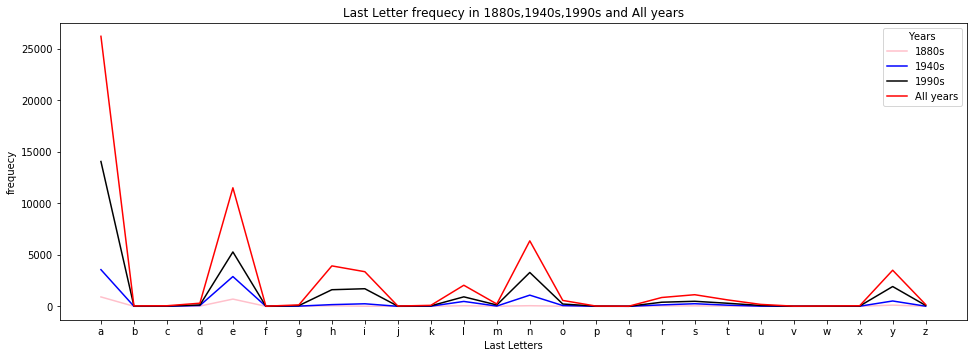

In [67]:
# plot the data 
fig = plt.figure(1,figsize=(18,15))
ax1 = fig.add_subplot(111)
fig.subplots_adjust(top=0.4,left=0.2)
ax1.set_ylabel('frequecy')

ax1.set_xlabel('Last Letters')
(p1,) = ax1.plot('Last_letters', 'count_1880s',data=last_letter,color='pink',label='1880s')
(p2,) = ax1.plot('Last_letters','count_1940s',data=last_letter,color='blue',label='1940s')
(p3,) = ax1.plot('Last_letters','count_1990s',data=last_letter,color='black',label='1990s')
(p4,) = ax1.plot('Last_letters','count_Allyear',data=last_letter,color='red',label='1990s')
ax1.set_title('Last Letter frequecy in 1880s,1940s,1990s and All years')
    
ax1.legend((p1,p2,p3,p4),('1880s','1940s','1990s','All years'),loc='upper right',title='Years')
plt.show()


 We can see that the last letter frequency in female names still stable during decades

# Part 4

Evaluate how stable this statistic is as follows. First, compute the variance for a random sample of 100 names over one of the three decades. For example, for each name x of your 100 names compute the variance of the name counts for x over the 1940s decade. Sort the names from highest variance names to lowest variance names and plot the variances using matplotblib. Do the same for an adjacent decade (1930s or 1950s). When you plot the 1930s name variances, use the name order you decided on for the 1940s.

In [69]:
# aggreate name counts in 1940s
n1940s_new=n1940s.groupby("name")["births"].sum()
# change to data frame
n1940s_new=pd.DataFrame({"name":n1940s_new.index,'count':n1940s_new.values})
n1940s_new

,name,count
0,Aaron,44
1,Abbe,5
2,Abbey,60
3,Abbie,508
4,Abby,443
5,Abelina,31
6,Abigail,648
7,Acquanetta,51
8,Ada,5882
9,Adah,79


In [ ]:
# get a ramdom sample of 100 names in 1940s
sample_1940s=n1940s_new.sample(n=100)  

In [193]:
#calculate the mean of sample
a=sample_1940s['count'].mean()
print(a)


1484.78


In [119]:
# calculate the variance of each name in sample
var=(sample_1940s['count']-a)**2
var

4907    2.189749e+06
4101    2.151444e+06
2934    2.151444e+06
7727    1.251669e+06
468     1.205121e+06
3861    2.189749e+06
9573    2.189749e+06
3849    1.733910e+06
6366    1.909316e+06
7438    5.571312e+09
5096    2.125123e+06
835     1.786981e+06
3590    2.163194e+06
2432    2.049994e+06
896     3.017547e+07
7666    1.950994e+06
1193    2.148511e+06
4080    2.130958e+06
286     2.090280e+06
5205    2.125123e+06
3597    2.169081e+06
1380    1.987480e+06
2535    1.763000e+06
9392    2.010100e+06
1896    2.125123e+06
9467    2.189749e+06
3372    2.164200e+08
4585    1.982244e+08
8673    2.145580e+06
3713    2.189749e+06
            ...     
1857    2.189749e+06
1167    1.979030e+06
4499    2.035701e+06
8311    1.984661e+06
8454    1.196355e+06
6097    1.804380e+05
961     1.925933e+06
1927    2.142652e+06
7069    2.104763e+06
2243    1.819207e+06
7711    2.186790e+06
4676    2.128039e+06
659     2.180879e+06
3089    1.956585e+06
3726    2.177927e+06
7836    2.136801e+06
5433    2.142

In [123]:
# sort by variance from highgest to lowest
var1=sample_1940s.merge(var.to_frame(), left_index=True, right_index=True).sort_values(by='count_y',ascending=False)
var1

,name,count_x,count_y
7438,Phyllis,76126,5.571312e+09
853,Bertha,16223,2.172151e+08
3372,Gayle,16196,2.164200e+08
4585,Joy,15564,1.982244e+08
3028,Eunice,7059,3.107193e+07
896,Bettye,6978,3.017547e+07
4907,Kitt,5,2.189749e+06
688,Awanda,5,2.189749e+06
9467,Wilburta,5,2.189749e+06
1197,Carmeletta,5,2.189749e+06


In [130]:
# since vairance is too big,I take log firstly
var1['log_var']=np.log(var1["count_y"])
var1

,name,count_x,count_y,log_var
7438,Phyllis,76126,5.571312e+09,22.440896
853,Bertha,16223,2.172151e+08,19.196399
3372,Gayle,16196,2.164200e+08,19.192731
4585,Joy,15564,1.982244e+08,19.104910
3028,Eunice,7059,3.107193e+07,17.251815
896,Bettye,6978,3.017547e+07,17.222540
4907,Kitt,5,2.189749e+06,14.599297
688,Awanda,5,2.189749e+06,14.599297
9467,Wilburta,5,2.189749e+06,14.599297
1197,Carmeletta,5,2.189749e+06,14.599297


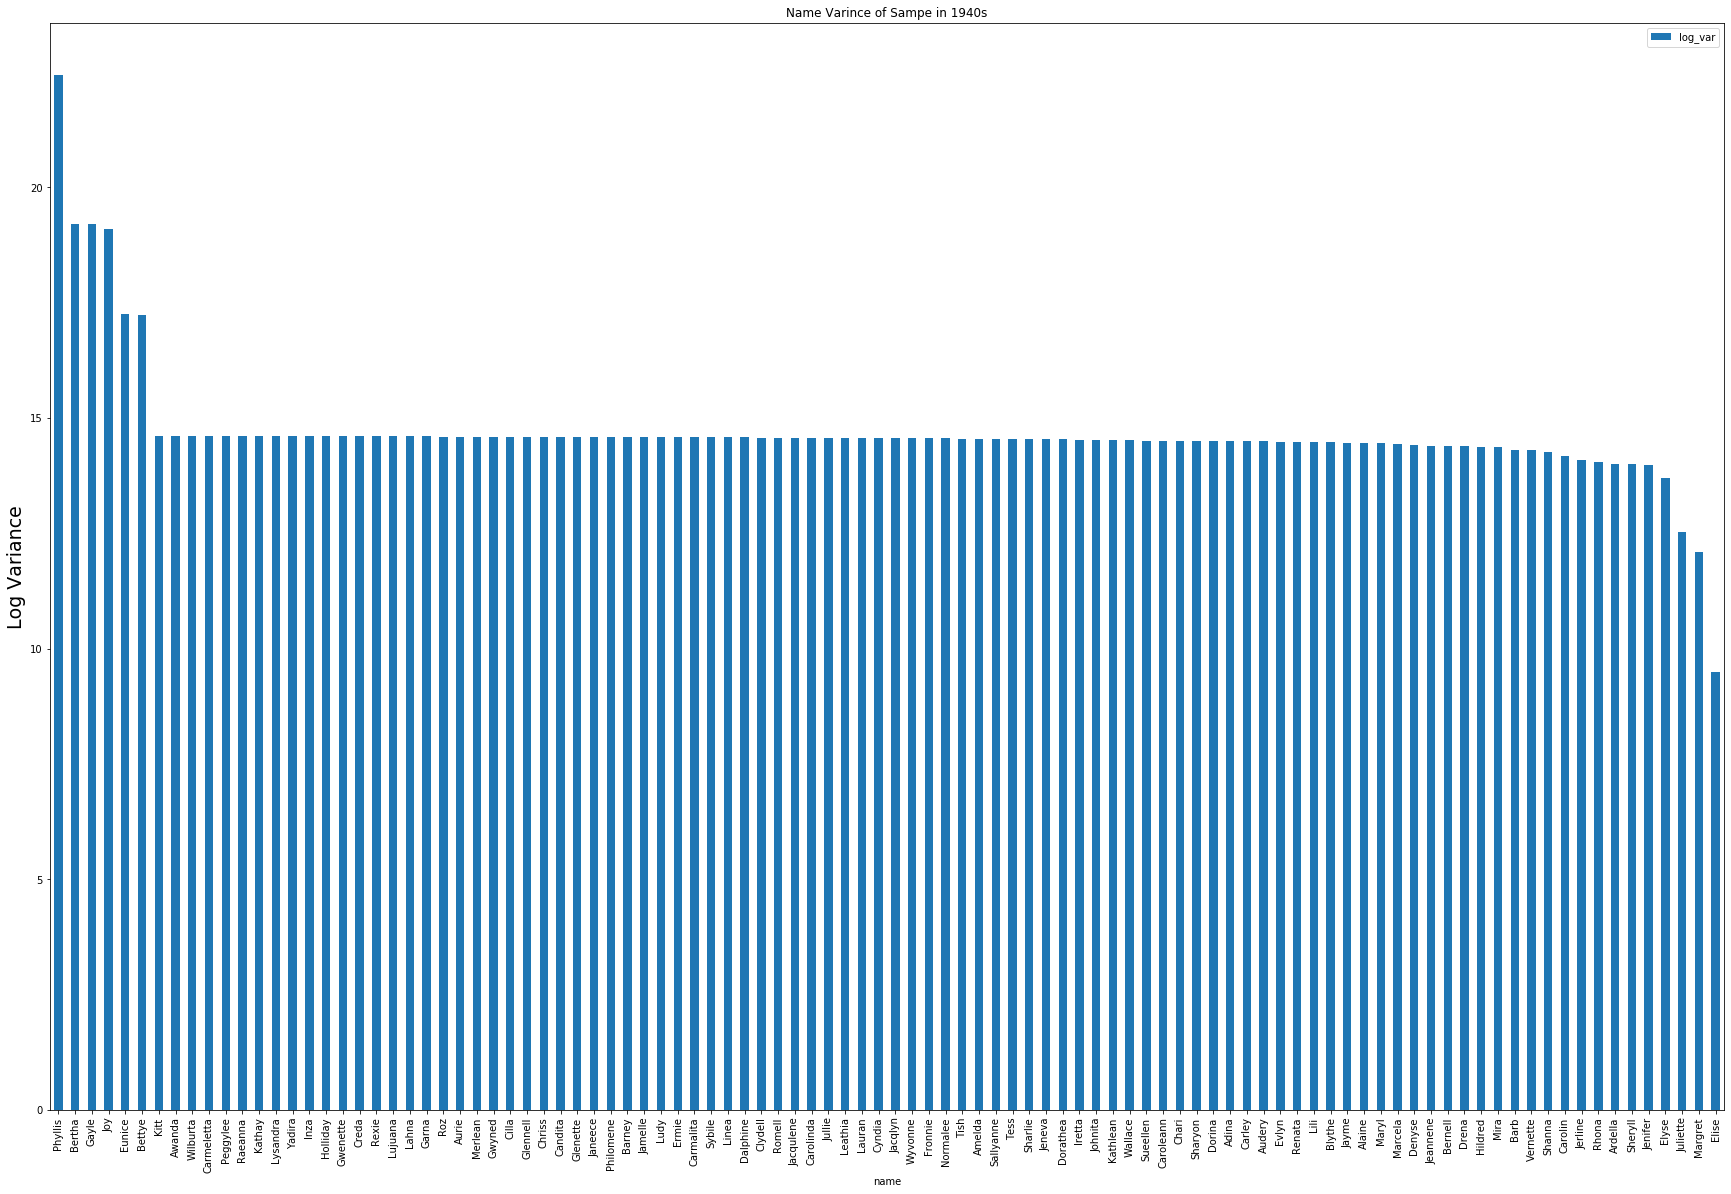

In [194]:
# plot the variance for sample in 1940s 
ax = var1.plot.bar(x='name', y='log_var',title='Name Varince of Sampe in 1940s',figsize=(30, 20))
ax.set_ylabel("Log Variance", fontsize=19)
plt.show()

From above plot, we can see Phyllis, Bertha, Gayle, Joy,Eunice,Bettye are most common name in 1940s , now , let's check the name in 1930s and 1950s

In [147]:
#filter the female names in 1930s,1950s
n1930s=female_name[(female_name['year']>=1930) & (female_name['year']<=1939)]
n1950s=female_name[(female_name['year']>=1950) & (female_name['year']<=1959)]

# aggreate name counts in 1930s, 1950s
n1930s_new=n1930s.groupby("name")["births"].sum()
n1930s_new=pd.DataFrame({"name":n1930s_new.index,'count_total_1930s':n1930s_new.values})
n1930s_new
n1950s_new=n1950s.groupby("name")["births"].sum()
n1950s_new=pd.DataFrame({"name":n1950s_new.index,'count_total_1950s':n1950s_new.values})
n1950s_new

,name,count_total_1950s
0,Aaron,88
1,Abagail,15
2,Abbe,417
3,Abbey,158
4,Abbi,11
5,Abbie,894
6,Abbigail,5
7,Abby,1163
8,Abbye,6
9,Abelina,40


In [158]:
# Merge the 1930s dataset and 1950s dataset to sample in 1940s by name ,make sure the name order is same
d1=pd.merge(var1,n1930s_new,how='left',on="name")
d2=pd.merge(d1,n1950s_new,how='left',on='name')
d2['count_total_1930s']=d2['count_total_1930s'].fillna(0)
d2['count_total_1950s']=d2['count_total_1950s'].fillna(0)
d2

,name,count_x,count_y,log_var,count_total_1930s,count_total_1950s
0,Phyllis,76126,5.571312e+09,22.440896,73779.0,57758.0
1,Bertha,16223,2.172151e+08,19.196399,21227.0,11251.0
2,Gayle,16196,2.164200e+08,19.192731,5030.0,23723.0
3,Joy,15564,1.982244e+08,19.104910,13184.0,24508.0
4,Eunice,7059,3.107193e+07,17.251815,11599.0,4492.0
5,Bettye,6978,3.017547e+07,17.222540,7052.0,2804.0
6,Kitt,5,2.189749e+06,14.599297,0.0,45.0
7,Awanda,5,2.189749e+06,14.599297,30.0,11.0
8,Wilburta,5,2.189749e+06,14.599297,11.0,0.0
9,Carmeletta,5,2.189749e+06,14.599297,5.0,0.0


In [159]:
# calculate the mean for 1930s and 1950s
mean1930s=d2['count_total_1930s'].mean()
mean1950s=d2['count_total_1950s'].mean()
print(mean1930s,mean1950s)

1397.05 1425.04


In [166]:
#calculate the name variance for 1930s and 1950s
d2['var_1930s']=(d2['count_total_1930s']-mean1930s)**2
d2['var_1950s']=(d2['count_total_1950s']-mean1950s)**2

# Since the variance is too big, I take log of the variance
d2['log_var1930s']=np.log(d2['var_1930s'])
d2['log_var1950s']=np.log(d2['var_1950s'])
d2

,name,count_x,count_y,log_var,count_total_1930s,count_total_1950s,var_1930s,var_1950s,log_var1930s,log_var1950s
0,Phyllis,76126,5.571312e+09,22.440896,73779.0,57758.0,5.239147e+09,3.173402e+09,22.379424,21.878070
1,Bertha,16223,2.172151e+08,19.196399,21227.0,11251.0,3.932269e+08,9.654949e+07,19.789897,18.385566
2,Gayle,16196,2.164200e+08,19.192731,5030.0,23723.0,1.319833e+07,4.971990e+08,16.395601,20.024501
3,Joy,15564,1.982244e+08,19.104910,13184.0,24508.0,1.389322e+08,5.328230e+08,18.749497,20.093700
4,Eunice,7059,3.107193e+07,17.251815,11599.0,4492.0,1.040798e+08,9.406244e+06,18.460668,16.056884
5,Bettye,6978,3.017547e+07,17.222540,7052.0,2804.0,3.197846e+07,1.901531e+06,17.280573,14.458170
6,Kitt,5,2.189749e+06,14.599297,0.0,45.0,1.951749e+06,1.904510e+06,14.484236,14.459736
7,Awanda,5,2.189749e+06,14.599297,30.0,11.0,1.868826e+06,1.999509e+06,14.440821,14.508412
8,Wilburta,5,2.189749e+06,14.599297,11.0,0.0,1.921135e+06,2.030739e+06,14.468427,14.523910
9,Carmeletta,5,2.189749e+06,14.599297,5.0,0.0,1.937803e+06,2.030739e+06,14.477066,14.523910


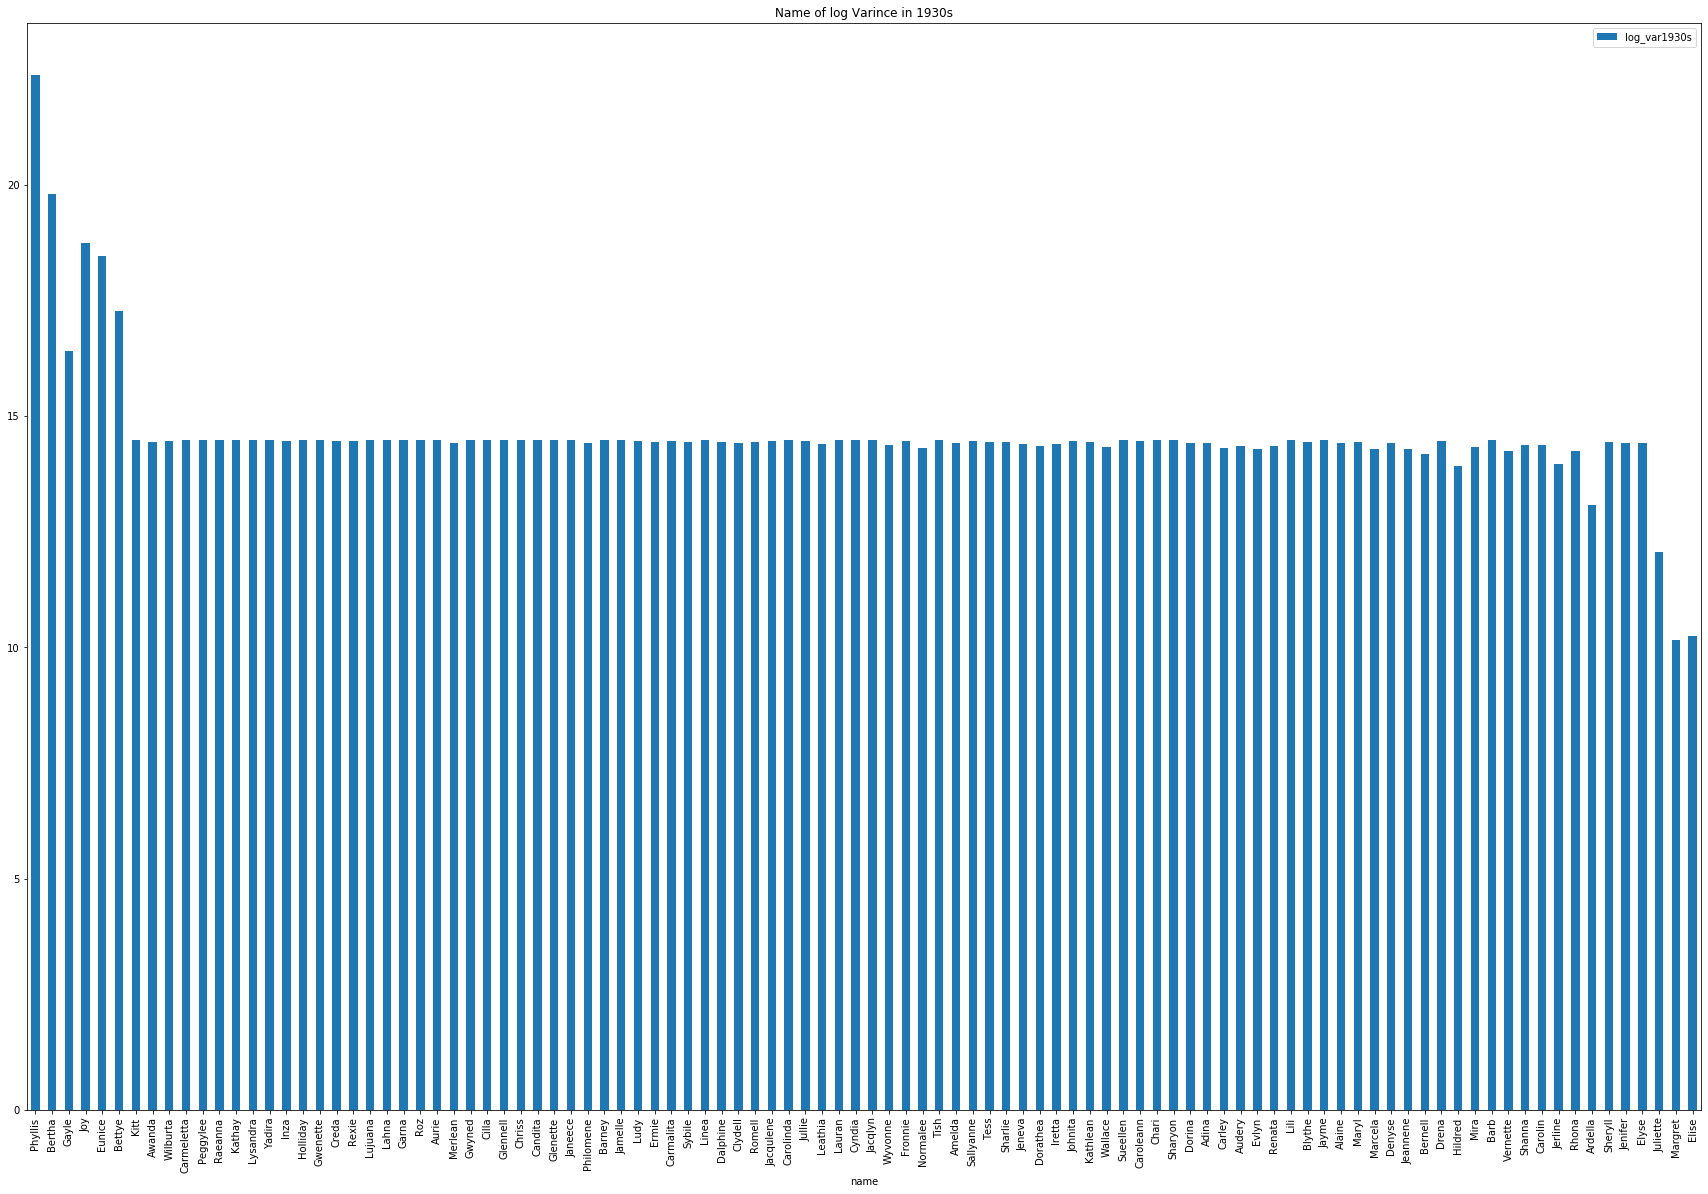

In [168]:
# plot the variance in 1930s for the same name order 
ax_1930s = d2.plot.bar(x="name", y="log_var1930s",title='Name of log Varince in 1930s',figsize=(30, 20))
ax.set_ylabel("Log Variance", fontsize=19)
plt.show()

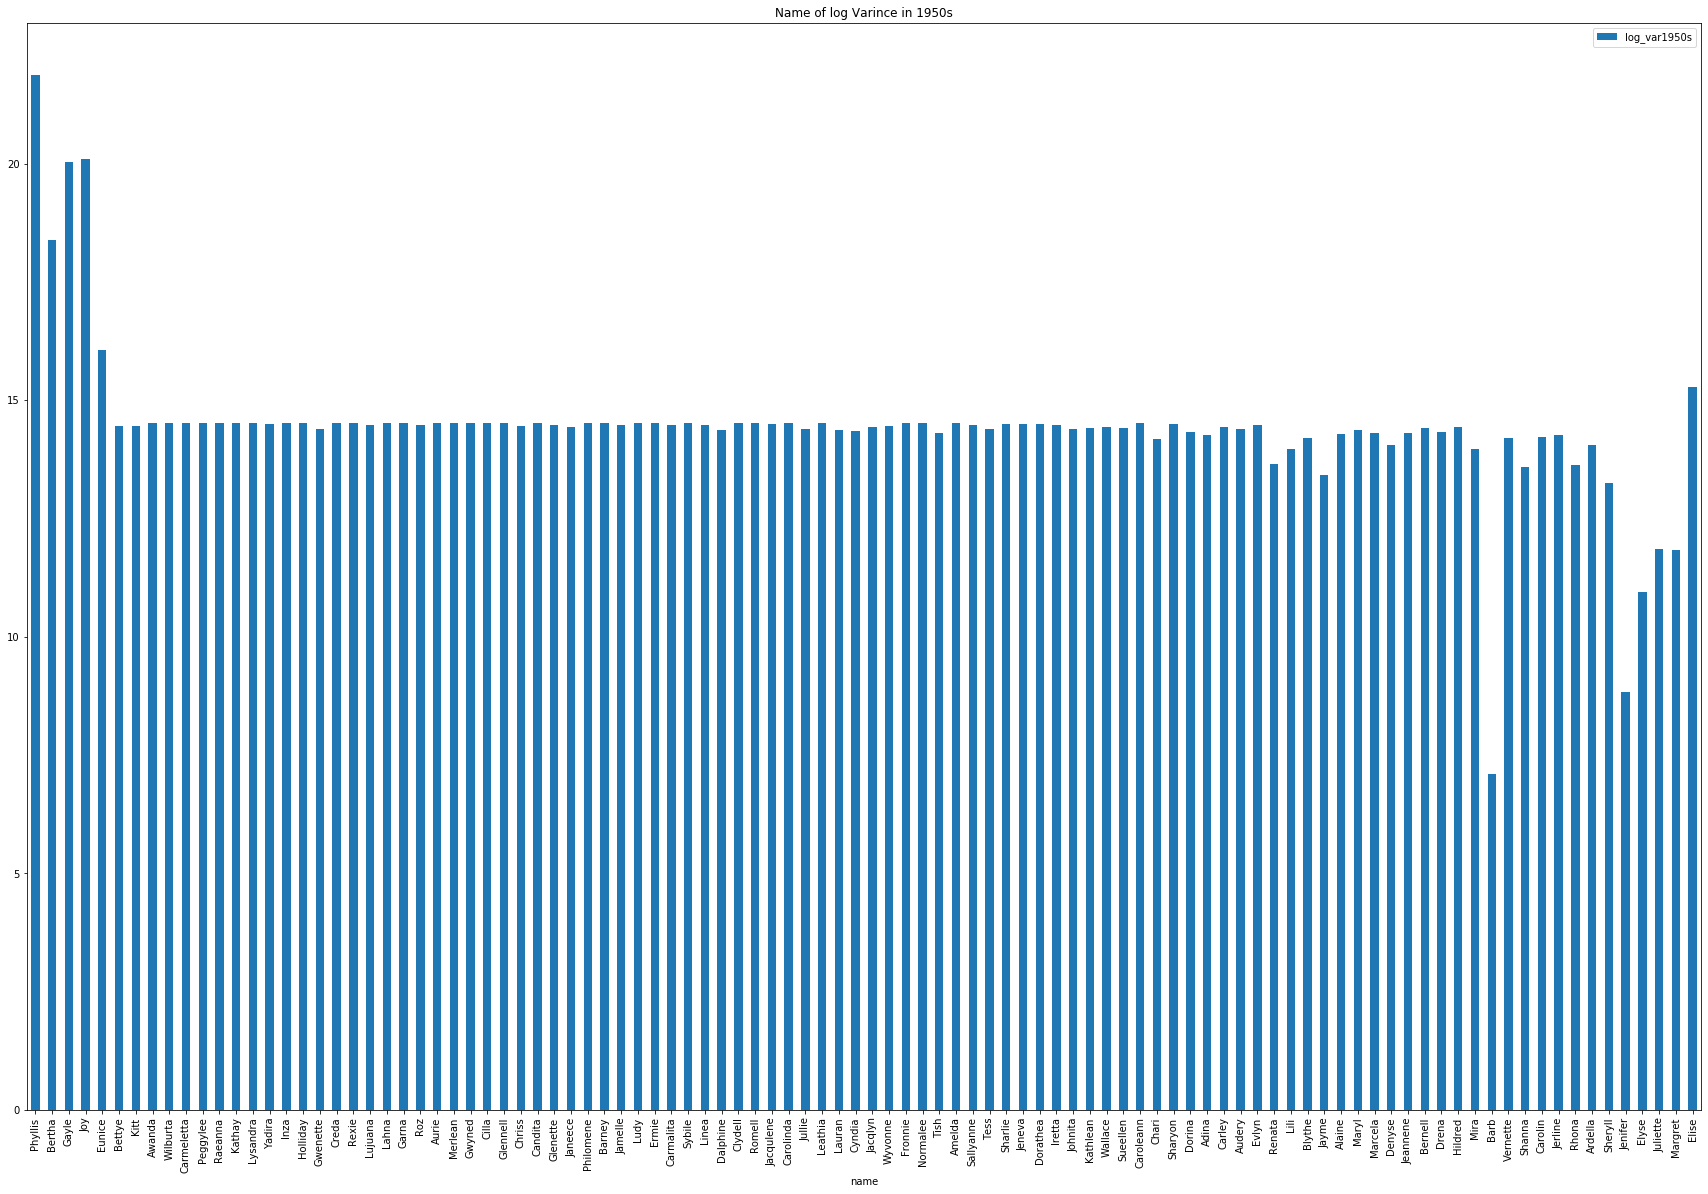

In [169]:
# plot the name variance in 1950s for the same name order 
ax_1950s = d2.plot.bar(x="name", y="log_var1950s",title='Name of log Varince in 1950s',figsize=(30, 20))
ax.set_ylabel("Log Variance", fontsize=19)
plt.show()

# Conclusion:   
After comparing the above name variance plot and data, we can see most name popularities are stable from 1930s to 1950s. For instance, name "Phyllis" is keeping No. 1 popular ranking all these decades. And top six popular names in 1940s are almost in top six ranking as well in 1930s and 1950s. It is probobaly because the culture at these decades are very similar and parents in these "world-war II" generation love the similar names. However, there are a few name exception showing variance changes. For instance, name 'Barb' is not very popular in 1930s and 1940s, but is showing a noticeable increase to around 1400 counts in 1950s. Especially a big increase occured after year 1956, shown in the below table. We then googled some famous female name with "Barb" or "Barbara", and found out one famous actress named "Barbara Eden" starting her first film and TV-series at 1956. Maybe some fans  liked her and used her name for their new babies. Another interesting name popularity change here is "Joy", it almost doubled its count from ~14 thousands to ~24 thousands. And relative ranking is also went up from No.4 in 1940s to No.2 in 1950s. It is likely that after end of World-War II in 1945, more and more people in America are having better lives than before. So a name "Joy" showing more happiness are becoming more and more popular than before-War.       

In [177]:
# example of name 'Barb' change trend in 1950s
print(n1950s[n1950s['name']=='Barb'])

        year  name gender  count
462322  1950  Barb      F     17
474218  1951  Barb      F      8
483836  1952  Barb      F     12
493511  1953  Barb      F     22
504089  1954  Barb      F     28
514445  1955  Barb      F     52
525053  1956  Barb      F    128
536078  1957  Barb      F    290
547536  1958  Barb      F    440
559045  1959  Barb      F    463
